This page provides a brief introduction about using geopandas to conduct spatial analysis...

For more information, please check: [geopandas introduction](https://geopandas.org/getting_started/introduction.html)

Firstly, load the packages...

In [1]:
import geopandas
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt

# 1. Load the data

In [2]:
path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


Write to local...

```Python
gdf.to_file("my_file.geojson")
```

Check the coordinate system...

The distance is measured in feet.

In [3]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# 2. Basic Operations

The following basic operations are presented:

- Measuring area
- Getting the polygon boundary and centroid
- Measuring distance

Let's start with measuring the area...

In [4]:
gdf = gdf.set_index("BoroName")
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [5]:
gdf['Area'] = gdf.area

In [6]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,Area
BoroName,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09


Moving on to getting the polygon boundary and centroid...

In [7]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [8]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

Measuring the distance...

In [9]:
first_centroid = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_centroid)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

# 3. Active Geometry in Geopandas

In geopandas, we can have multiple types of geometry in the geodataframe. You can set the active geometry by using the **set_geometry** method.

Firstly, let us check the current active geometry

In [10]:
gdf.geometry

BoroName
Staten Island    MULTIPOLYGON (((970217.022 145643.332, 970227....
Queens           MULTIPOLYGON (((1029606.077 156073.814, 102957...
Brooklyn         MULTIPOLYGON (((1021176.479 151374.797, 102100...
Manhattan        MULTIPOLYGON (((981219.056 188655.316, 980940....
Bronx            MULTIPOLYGON (((1012821.806 229228.265, 101278...
Name: geometry, dtype: geometry

we plot the "Area" we measured earlier using the active geometry column. We also want to show a legend (legend=True).

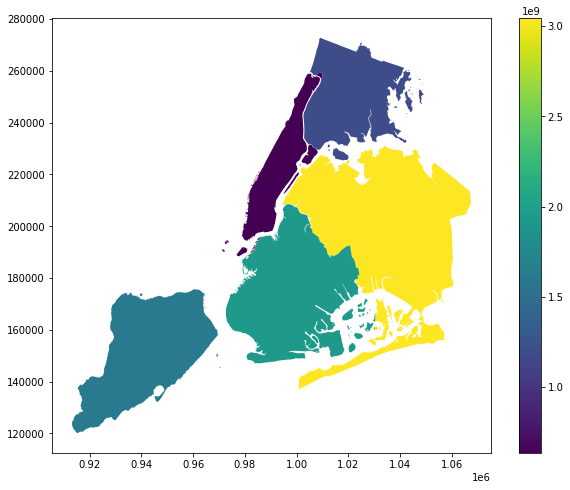

In [11]:
# Plot the data

figure1, axis1 = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot('Area', legend=True, ax=axis1)
plt.show()

By switching the geometry, we can only plot the centroid of those boroughs...

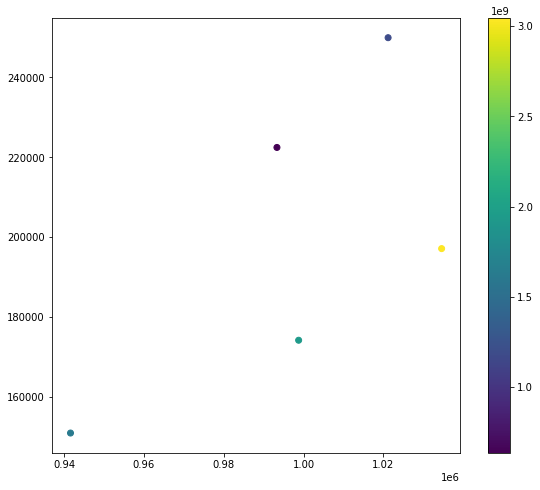

In [12]:
gdf = gdf.set_geometry("centroid") # Choose the "centroid" as the main geometry

fig2, axis2 = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot("Area", legend=True, ax=axis2)
plt.show()

Finally, we can also consider two geometries simultaneously...

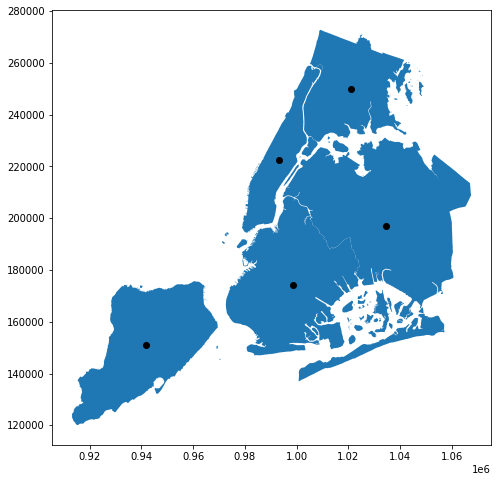

In [13]:
fig3, axis3 = plt.subplots(1, 1, figsize=(10, 8))
gdf["geometry"].plot(ax=axis3)
gdf["centroid"].plot(ax=axis3, color="black")
plt.show()

Set the geometry back to "geometry"

In [14]:
gdf = gdf.set_geometry("geometry")

# 4. Geometry Creation

We can further work with the shapefile by creating new shapes:

- Convex Hull
- Buffer

First, let us create a convex hull based on the shapefile

In [15]:
gdf["convex_hull"] = gdf.convex_hull

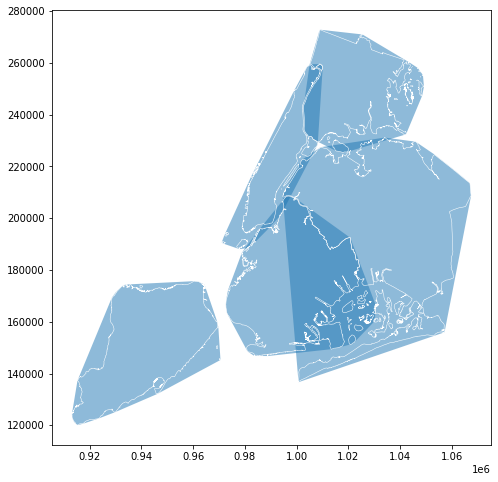

In [16]:
fig4, axis4 = plt.subplots(1, 1, figsize=(10, 8))
gdf['convex_hull'].plot(ax=axis4, alpha=0.5)
gdf['boundary'].plot(ax=axis4, color='white', linewidth=0.5)
plt.show()

Buffer Analysis: Let’s buffer the boroughs and their centroids and plot both on top of each other.

In [17]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)

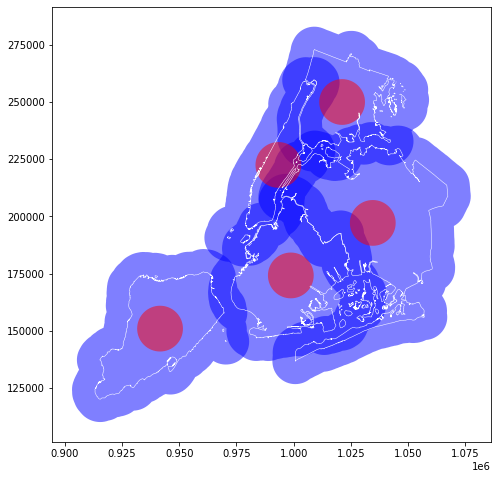

In [18]:
fig5, axis5 = plt.subplots(1, 1, figsize=(10, 8))
gdf["buffered"].plot(ax=axis5, alpha=.5, color='blue')
gdf["buffered_centroid"].plot(ax=axis5, color="red", alpha=.5)  # passing the first plot as an axis to the second
gdf["boundary"].plot(ax=axis5, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5
plt.show()

# 5. Geometry Relations

Check the spatial relationships of two polygons.

- Check whether two polygons intersect or not
- Check whether the buffered centroids are entirely within the original boroughs polygons

Firstly, create a shapefile for the brooklyn...

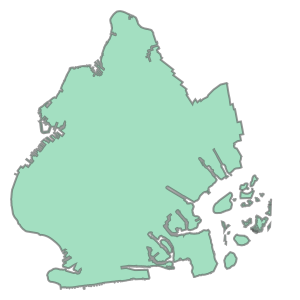

In [19]:
brooklyn = gdf.loc['Brooklyn', 'geometry']
brooklyn

In [20]:
print(type(brooklyn))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [21]:
brooklyn_geodataframe = geopandas.GeoDataFrame(columns=['geometry'])
brooklyn_geodataframe['geometry'] = brooklyn.geoms

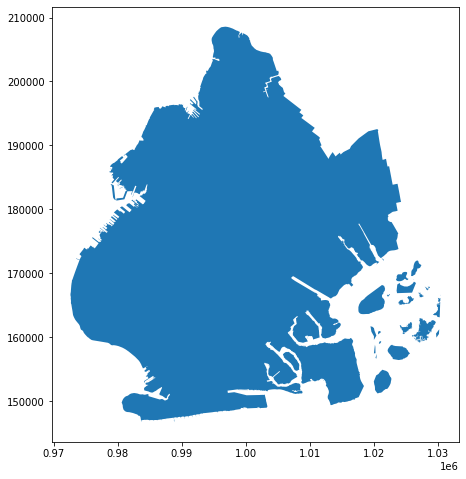

In [22]:
fig_brooklyn, axis_brooklyn = plt.subplots(1, 1, figsize=(10, 8))
brooklyn_geodataframe.plot(ax = axis_brooklyn)
plt.show()

Check whether brooklyn intersect with other boroughs...

In [23]:
gdf["buffered"].intersects(brooklyn)

BoroName
Staten Island     True
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

Check whether the buffered centroids are entirely within the original boroughs polygons...

In [24]:
gdf["within"] = gdf["buffered_centroid"].within(gdf)
gdf["within"]

BoroName
Staten Island     True
Queens            True
Brooklyn         False
Manhattan        False
Bronx            False
Name: within, dtype: bool

<AxesSubplot:>

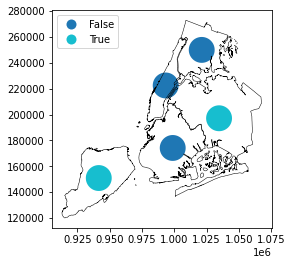

In [25]:
gdf = gdf.set_geometry("buffered_centroid")
ax = gdf.plot("within", legend=True, categorical=True, legend_kwds={'loc': "upper left"})  # using categorical plot and setting the position of the legend
gdf["boundary"].plot(ax=ax, color="black", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# 6. Projections

Use the **to_crs** method...

The epsg code can be found in [epsg.io](https://epsg.io/)

In [26]:
gdf = gdf.set_geometry("geometry")
boroughs_4326 = gdf.to_crs(epsg = 4326)

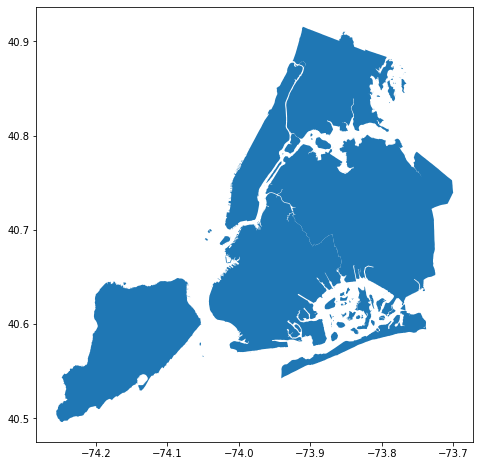

In [27]:
fig_4326, axis_4326 = plt.subplots(1, 1, figsize=(10, 8))
boroughs_4326.plot(ax = axis_4326)
plt.show()